In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

Reading the dataset

In [87]:

d=pd.read_csv('/home/rgukt/Desktop/summer_Intern/archive/crop_yield.csv')

In [88]:
df=pd.DataFrame(d)
print(df)

                Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0

Understanding/Analyzing the Data

In [89]:
print(df.head())

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [90]:
print(df.tail())

                Crop  Crop_Year       Season              State      Area  \
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818  


In [91]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
18155,Tapioca,2014,Kharif,Puducherry,188.0,4782,1330.0,28380.48,62.04,25.440000
13208,Horse-gram,2013,Kharif,Himachal Pradesh,1750.0,613,1216.9,252857.50,472.50,0.352000
18360,Dry chillies,2019,Kharif,Jammu and Kashmir,678.0,548,1324.1,116453.28,250.86,0.862727
883,Other Kharif pulses,2001,Kharif,Karnataka,137310.0,42618,1002.9,14023470.30,35700.60,0.276400
17310,Sunflower,2019,Kharif,West Bengal,7842.0,9576,1733.4,1346941.92,2901.54,1.114667


In [92]:
df.shape

(19689, 10)

In [93]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [94]:
df.values

array([['Arecanut', 1997, 'Whole Year ', ..., 7024878.38, 22882.34,
        0.796086957],
       ['Arhar/Tur', 1997, 'Kharif     ', ..., 631643.29, 2057.47,
        0.710434783],
       ['Castor seed', 1997, 'Kharif     ', ..., 75755.32, 246.76,
        0.238333333],
       ...,
       ['Maize', 1997, 'Kharif     ', ..., 29586735.11, 96373.73, 1.285],
       ['Rice', 1997, 'Kharif     ', ..., 26242746.82, 85481.26,
        0.016666667],
       ['Wheat', 1997, 'Rabi       ', ..., 22778368.48, 74196.64,
        1.261818182]], dtype=object)

In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None


In [96]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


columns(categories) and their counts

In [97]:
df['Crop'].value_counts()

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garli

In [98]:
 df['Crop_Year'].value_counts()

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: count, dtype: int64

In [99]:
df['Season'].value_counts()

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

In [100]:
df['State'].value_counts()

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Uttarakhand           764
Odisha                760
Assam                 731
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu and Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

In [101]:
df.Area.unique()

array([ 73814.,   6637.,    796., ..., 310883., 275746., 239344.])

In [102]:
df.Production.unique()

array([ 56708,   4685,     22, ..., 205000, 440900, 392160])

In [103]:
df.Annual_Rainfall.unique()

array([2051.4      , 1266.7      , 3252.4      , 3818.2      ,
       1852.9      , 1434.5875   , 2354.4      , 2964.9      ,
       1260.8      , 3151.5      , 6552.7      , 2152.5      ,
       2201.8      , 3879.3      , 2914.6      , 6200.3      ,
       2318.1      ,  935.6      , 1965.5      , 3886.9      ,
       1213.3      , 2412.6      , 6258.8      , 1907.7      ,
        928.4      , 1824.7      , 2530.6      , 1002.9      ,
       2946.7      , 4241.       , 1556.6      ,  648.1      ,
       1973.6      , 2516.3      , 2511.2      ,  315.9      ,
       1629.1      ,  826.       , 2213.7      , 3011.6      ,
        867.6      , 2386.       , 3321.3      ,  345.6      ,
       1526.7      , 1117.7      , 2880.2      , 4767.9      ,
       1034.       , 1075.5      , 2184.6      , 1316.2      ,
       3030.9      , 3374.4      , 1364.1      , 1650.1      ,
       2454.7      ,  845.2      , 1774.9      , 1146.3      ,
       3429.7      ,  927.9      , 1631.4      , 2154.1

In [104]:
df.Fertilizer.unique()

array([ 7024878.38,   631643.29,    75755.32, ..., 29586735.11,
       26242746.82, 22778368.48])

In [105]:
df.Pesticide.unique()

array([22882.34,  2057.47,   246.76, ..., 96373.73, 85481.26, 74196.64])

In [106]:
df.Yield.unique()

array([0.79608696, 0.71043478, 0.23833333, ..., 1.44142857, 0.01666667,
       1.26181818])

Finding and filling Null Values

In [107]:
df.isnull()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
19684,False,False,False,False,False,False,False,False,False,False
19685,False,False,False,False,False,False,False,False,False,False
19686,False,False,False,False,False,False,False,False,False,False
19687,False,False,False,False,False,False,False,False,False,False


In [108]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

Data visualization

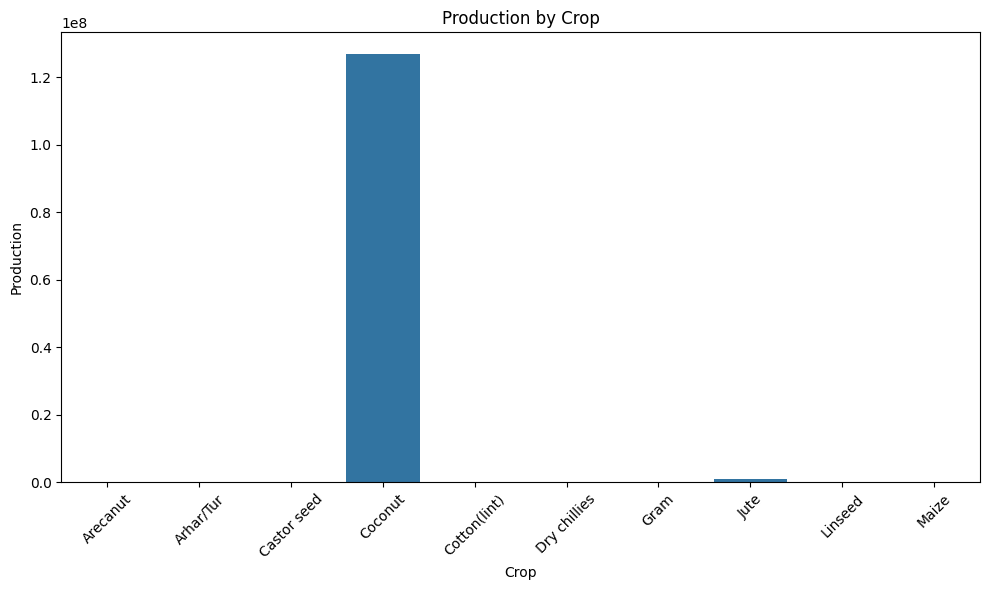

In [109]:

data = {
    'Crop': ['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut', 'Cotton(lint)', 
             'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize'],
    'Crop_Year': [1997]*10,
    'Season': ['Whole Year', 'Kharif', 'Kharif', 'Whole Year', 'Kharif', 
               'Whole Year', 'Rabi', 'Kharif', 'Rabi', 'Kharif'],
    'State': ['Assam']*10,
    'Area': [73814.0, 6637.0, 796.0, 19656.0, 1739.0, 13587.0, 2979.0, 94520.0, 10098.0, 19216.0],
    'Production': [56708, 4685, 22, 126905000, 794, 9073, 1507, 904095, 5158, 14721],
    'Annual_Rainfall': [2051.4]*10,
    'Fertilizer': [7024878.38, 631643.29, 75755.32, 1870661.52, 165500.63, 
                   1293074.79, 283511.43, 8995468.40, 961026.66, 1828786.72],
    'Pesticide': [22882.34, 2057.47, 246.76, 6093.36, 539.09, 4211.97, 923.49, 29301.20, 3130.38, 5956.96],
    'Yield': [0.796087, 0.710435, 0.238333, 5238.051739, 0.420909, 
              0.643636, 0.465455, 9.919565, 0.461364, 0.615652]
}

df = pd.DataFrame(data)



# Bar plot of Production by Crop
plt.figure(figsize=(10, 6))
sns.barplot(x='Crop', y='Production', data=df)
plt.title('Production by Crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


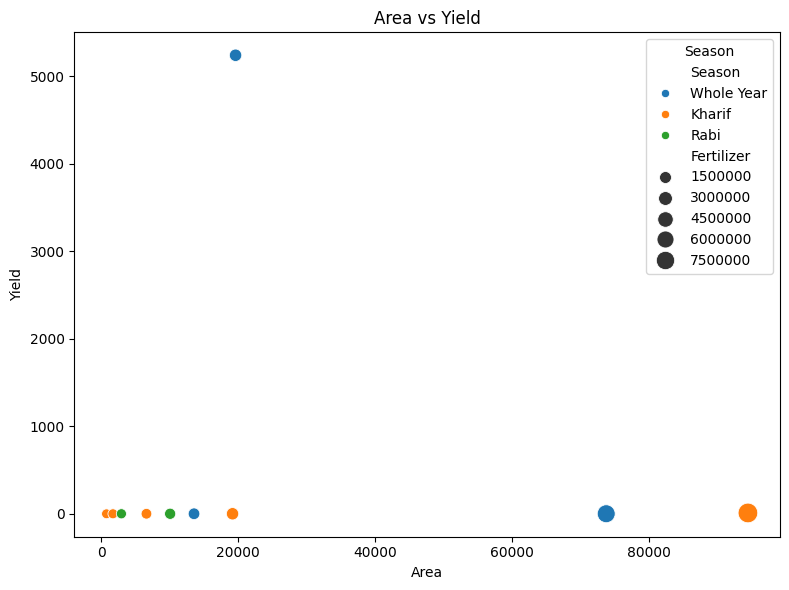

In [110]:

#Scatter plot of Area vs Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Yield', data=df, hue='Season', size='Fertilizer', sizes=(50, 200))
plt.title('Area vs Yield')
plt.xlabel('Area')
plt.ylabel('Yield')
plt.legend(title='Season')
plt.tight_layout()
plt.show()


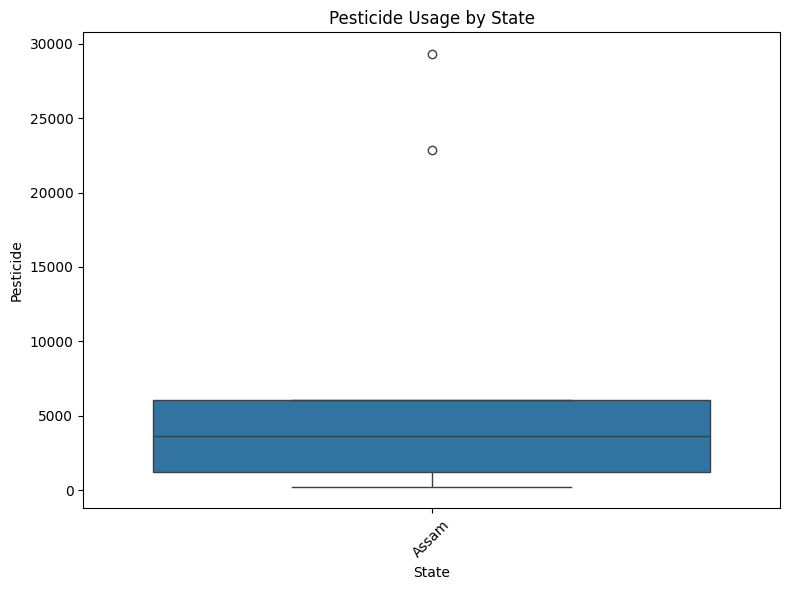

In [111]:
# Box plot of Pesticide usage
plt.figure(figsize=(8, 6))
sns.boxplot(x='State', y='Pesticide', data=df)
plt.title('Pesticide Usage by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


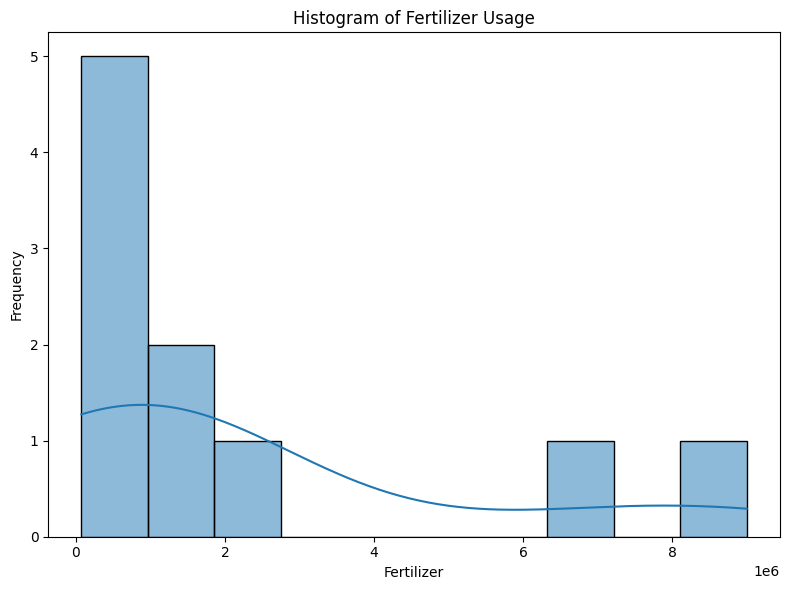

In [112]:
#Histogram of Fertilizer usage
plt.figure(figsize=(8, 6))
sns.histplot(df['Fertilizer'], bins=10, kde=True)
plt.title('Histogram of Fertilizer Usage')
plt.xlabel('Fertilizer')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

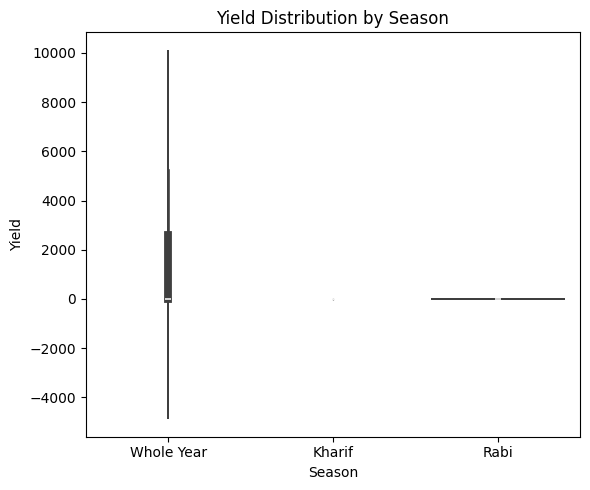

In [113]:
#Violin plot of Yield by Season
plt.figure(figsize=(6,5))
sns.violinplot(x='Season', y='Yield', data=df)
plt.title('Yield Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.tight_layout()
plt.show()

converting column values to numerical values

In [114]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [115]:


# Extract categorical columns
cat_cols = ['Crop', 'Season', 'State']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform on categorical columns
encoded_cols = encoder.fit_transform(df[cat_cols])

# Get feature names after one-hot encoding
cat_feature_names = encoder.categories_
feature_names = []
for i, col in enumerate(cat_cols):
    for category in cat_feature_names[i][1:]:  # Skip the first category (drop='first')
        feature_names.append(f"{col}_{category}")

# Create DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

# Concatenate encoded columns with original DataFrame
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)

# Print the info of the encoded DataFrame
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop_Year          10 non-null     int64  
 1   Area               10 non-null     float64
 2   Production         10 non-null     int64  
 3   Annual_Rainfall    10 non-null     float64
 4   Fertilizer         10 non-null     float64
 5   Pesticide          10 non-null     float64
 6   Yield              10 non-null     float64
 7   Crop_Arhar/Tur     10 non-null     float64
 8   Crop_Castor seed   10 non-null     float64
 9   Crop_Coconut       10 non-null     float64
 10  Crop_Cotton(lint)  10 non-null     float64
 11  Crop_Dry chillies  10 non-null     float64
 12  Crop_Gram          10 non-null     float64
 13  Crop_Jute          10 non-null     float64
 14  Crop_Linseed       10 non-null     float64
 15  Crop_Maize         10 non-null     float64
 16  Season_Rabi        10 non-nul

/home/rgukt/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [116]:
# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns
num_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [117]:
print(df_scaled.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop_Year          10 non-null     int64  
 1   Area               10 non-null     float64
 2   Production         10 non-null     float64
 3   Annual_Rainfall    10 non-null     float64
 4   Fertilizer         10 non-null     float64
 5   Pesticide          10 non-null     float64
 6   Yield              10 non-null     float64
 7   Crop_Arhar/Tur     10 non-null     float64
 8   Crop_Castor seed   10 non-null     float64
 9   Crop_Coconut       10 non-null     float64
 10  Crop_Cotton(lint)  10 non-null     float64
 11  Crop_Dry chillies  10 non-null     float64
 12  Crop_Gram          10 non-null     float64
 13  Crop_Jute          10 non-null     float64
 14  Crop_Linseed       10 non-null     float64
 15  Crop_Maize         10 non-null     float64
 16  Season_Rabi        10 non-nul

Splitting the Dataset

In [129]:
# Assuming df_encoded is your preprocessed DataFrame
X = df_encoded.drop(columns=['Yield'])  # Features
y = df_encoded['Yield']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (8, 17), y_train shape: (8,)
X_test shape: (2, 17), y_test shape: (2,)


In [130]:
print(X_train.head())

   Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
5       1997  13587.0        9073           2051.4  1293074.79    4211.97   
0       1997  73814.0       56708           2051.4  7024878.38   22882.34   
7       1997  94520.0      904095           2051.4  8995468.40   29301.20   
2       1997    796.0          22           2051.4    75755.32     246.76   
9       1997  19216.0       14721           2051.4  1828786.72    5956.96   

   Crop_Arhar/Tur  Crop_Castor seed  Crop_Coconut  Crop_Cotton(lint)  \
5             0.0               0.0           0.0                0.0   
0             0.0               0.0           0.0                0.0   
7             0.0               0.0           0.0                0.0   
2             0.0               1.0           0.0                0.0   
9             0.0               0.0           0.0                0.0   

   Crop_Dry chillies  Crop_Gram  Crop_Jute  Crop_Linseed  Crop_Maize  \
5                1.0        0.0 

In [131]:
print(X_test.head())

   Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
8       1997  10098.0        5158           2051.4   961026.66    3130.38   
1       1997   6637.0        4685           2051.4   631643.29    2057.47   

   Crop_Arhar/Tur  Crop_Castor seed  Crop_Coconut  Crop_Cotton(lint)  \
8             0.0               0.0           0.0                0.0   
1             1.0               0.0           0.0                0.0   

   Crop_Dry chillies  Crop_Gram  Crop_Jute  Crop_Linseed  Crop_Maize  \
8                0.0        0.0        0.0           1.0         0.0   
1                0.0        0.0        0.0           0.0         0.0   

   Season_Rabi  Season_Whole Year  
8          1.0                0.0  
1          0.0                0.0  


In [132]:
print(y_train)

5       0.643636
0       0.796087
7       9.919565
2       0.238333
9       0.615652
4       0.420909
3    5238.051739
6       0.465455
Name: Yield, dtype: float64


In [133]:
print(y_test)

8    0.461364
1    0.710435
Name: Yield, dtype: float64


Linear Regression

In [134]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [137]:
# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1.4683718099986711
R-squared (R2): -93.67813637161287


Support Vector Machine(SVM)

In [128]:
# Drop unnecessary columns for SVM training (like Crop and State for simplicity)
X = df.drop(['Crop', 'State'], axis=1)
y = df['Season']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Preprocessing pipeline for numerical and categorical features
numeric_features = X.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Combine preprocessing with SVM model
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', SVC(kernel='linear'))])
# Fit the model
svm_model.fit(X_train, y_train)
# Predictions
y_pred = svm_model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy of Support vector machine classifier:",metrics.accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

      Kharif       1.00      1.00      1.00         1
        Rabi       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy of Support vector machine classifier: 1.0


In [ ]:
newdata={'Gender':1,
          'Married':1,
          'Dependents':2,
          'Education':0,
          'Self_Employed':0,
          'ApplicantIncome':2889,
          'CoapplicantIncome':0,
          'LoanAmount':45,
          'Loan_Amount_Term':180,
          'Credit_History':0,
          'Property_Area':1}
newinput=pd.DataFrame(newdata,index=[0])
predictedlabel=Svmc.predict(newinput)
result=predictedlabel[0]
if result==1:
 print("Loan approved")
else:
  print("Loan not approved")